<a href="https://colab.research.google.com/github/antoniogss/air_quality/blob/main/stat_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Notebook imports and packages

In [ ]:
import pandas as pd
import numpy as np
import warnings as war
import google.colab as gc
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files #Upload files into the notebook
from glob import glob
from datetime import date, time, datetime, timedelta
from functools import reduce
from matplotlib import dates, rcParams
from scipy.stats import linregress
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

war.filterwarnings('ignore')

#Google Drive connection

In [ ]:
gc.drive.mount('./gdrive/', 
               force_remount=True
              )
gc.output.clear()

#Load the csv files into DFs

In [ ]:
%cd ./gdrive/MyDrive/air_quality/datasets/created_datasets/

/content/gdrive/MyDrive/air_quality/datasets/created_datasets


In [ ]:
!ls

a_cp.csv  a_pd.csv  b_in.csv  c_ib.csv	df.csv
a_ib.csv  b_cp.csv  b_pd.csv  c_in.csv	inmet_dia.csv
a_in.csv  b_ib.csv  c_cp.csv  c_pd.csv	inmet_mes.csv


##CETESB

###Daily

In [ ]:
df = pd.read_csv('df.csv')

# Drop first column of dataframe
df = df.iloc[: , 1:]

df['data_hora'] = pd.to_datetime(df['data_hora'])

cols = {'O3' : 'mean', 
        'NO' : 'mean',
        'NO2' : 'mean'}

dias_ptbr = {'Sunday':'Domingo', 
             'Monday':'Segunda-feira', 
             'Tuesday':'Terça-feira', 
             'Wednesday':'Quarta-feira', 
             'Thursday':'Quinta-feira', 
             'Friday':'Sexta-feira', 
             'Saturday':'Sábado'}

df['data_hora'] = pd.to_datetime(df['data_hora'])
df.set_index('data_hora', inplace = True)
df_dia = df.resample('D').agg(cols)
df_dia.reset_index(inplace=True)
df_dia['dia_da_semana'] = df_dia['data_hora'].dt.day_name().replace(dias_ptbr)
# df_dia.head()

###Monthly

In [ ]:
df = pd.read_csv('df.csv')

# Drop first column of dataframe
df = df.iloc[: , 1:]

df['data_hora'] = pd.to_datetime(df['data_hora'])

mes_ptbr = {'January':'Janeiro', 
             'February':'Fevereiro', 
             'March':'Março', 
             'April':'Abril', 
             'May':'Maio', 
             'June':'Junho', 
             'July':'Julho',
             'August':'Agosto', 
             'September':'Setembro',
             'October':'Outubro', 
             'November':'Novembro',
             'December':'Dezembro'}

df['data_hora'] = pd.to_datetime(df['data_hora'])
df.set_index('data_hora', inplace = True)
df_mes = df.resample('M').agg(cols)
df_mes.reset_index(inplace=True)
df_mes['mes'] = df_mes['data_hora'].dt.month_name().replace(mes_ptbr)
# df_mes.head()

###Yearly

In [ ]:
df = pd.read_csv('df.csv')

# Drop first column of dataframe
df = df.iloc[: , 1:]

df['data_hora'] = pd.to_datetime(df['data_hora'])

df['data_hora'] = pd.to_datetime(df['data_hora'])
df.set_index('data_hora', inplace = True)
df_ano = df.resample('A').agg(cols)
df_ano.reset_index(inplace=True)
# df_ano.head()

##INMET

###Daily

In [ ]:
inmet_dia = pd.read_csv("./inmet_dia.csv")

# Drop first column of dataframe
inmet_dia = inmet_dia.iloc[: , 1:]

inmet_dia['data'] = pd.to_datetime(inmet_dia['data'])

# inmet_dia.head()

###Monthly

In [ ]:
inmet_mes = pd.read_csv("./inmet_mes.csv")

# Drop first column of dataframe
inmet_mes = inmet_mes.iloc[: , 1:]

inmet_mes['data'] = pd.to_datetime(inmet_mes['data'])

# inmet_mes.head()

#Linear Regression

Using Gradient Descent

##Heatmap

###CETESB

####Daily

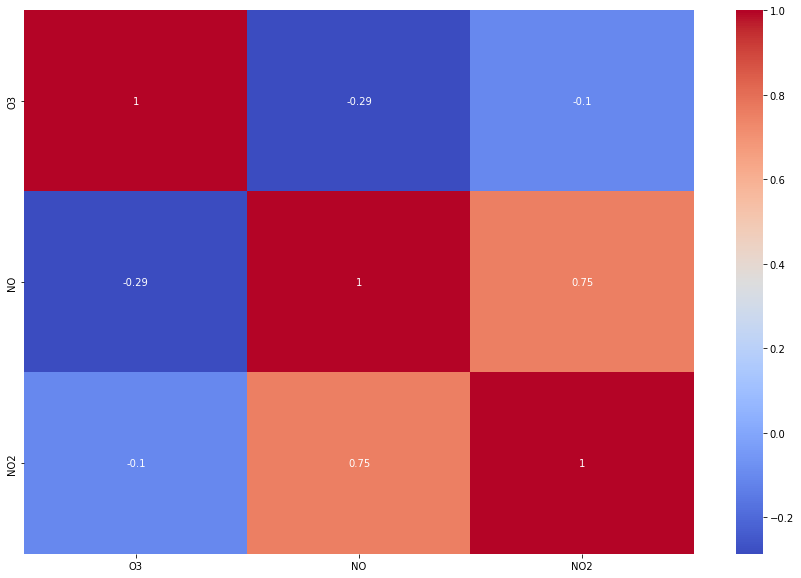

In [ ]:
#@title
plt.figure(figsize=(15,10))
sns.heatmap(df_dia.corr(),
            cmap='coolwarm',
            annot=True
            );

####Monthly

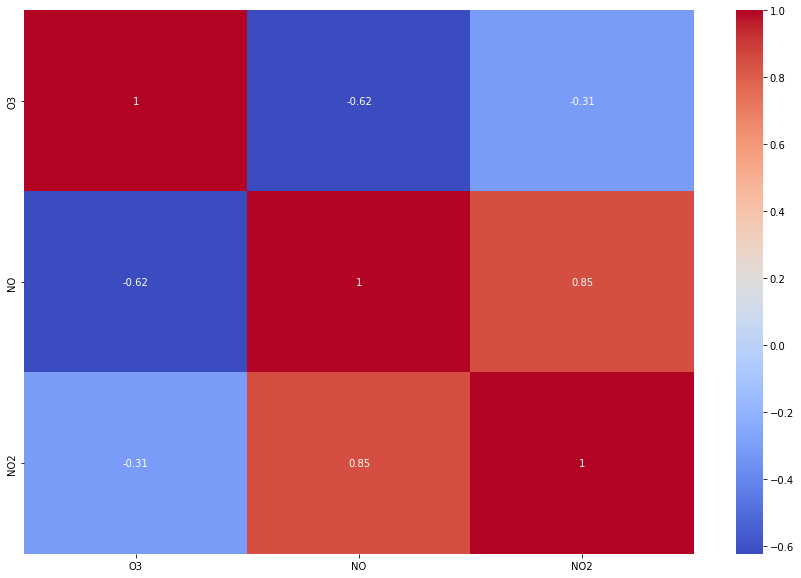

In [ ]:
#@title
plt.figure(figsize=(15,10))
sns.heatmap(df_mes.corr(),
            cmap='coolwarm',
            annot=True
            );

####Yearly

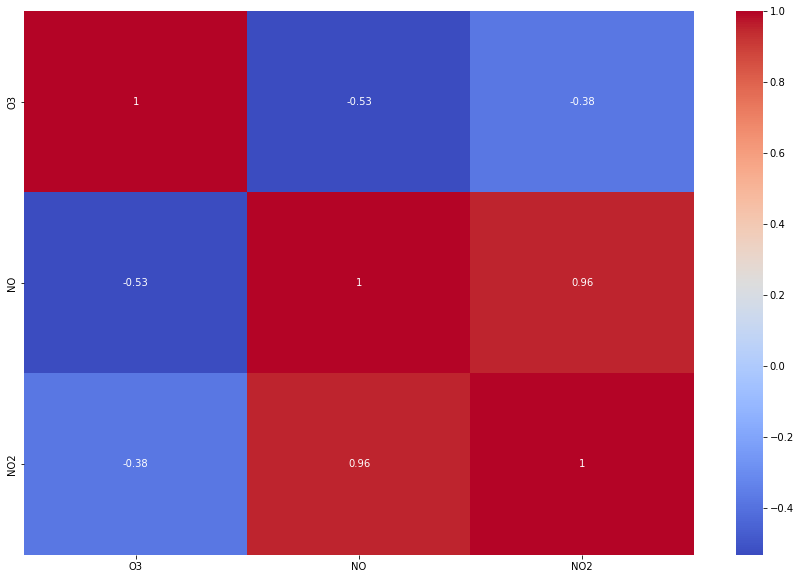

In [ ]:
#@title
plt.figure(figsize=(15,10))
sns.heatmap(df_ano.corr(),
            cmap='coolwarm',
            annot=True
            );

###INMET

####Daily

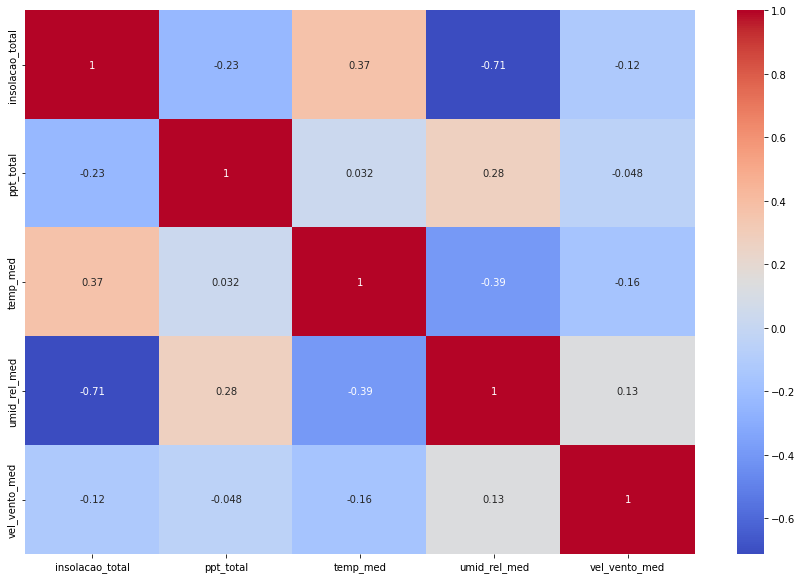

In [ ]:
#@title
plt.figure(figsize=(15,10))
sns.heatmap(inmet_dia.drop(['temp_min', 'temp_max'], axis=1).corr(),
            cmap='coolwarm',
            annot=True
            );

####Monthly

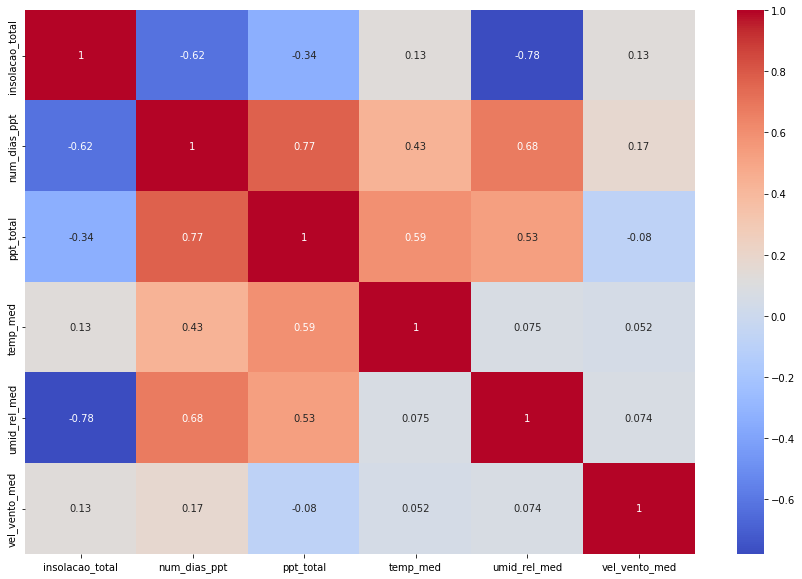

In [ ]:
#@title
plt.figure(figsize=(15,10))
sns.heatmap(inmet_mes.drop(['temp_min', 'temp_max'], axis=1).corr(),
            cmap='coolwarm',
            annot=True
            );

###CETESB + INMET

####Daily

In [ ]:
#@title
cetesb_inmet_dia = df_dia.merge(inmet_dia.drop(['temp_min',
                                                'temp_max', 
                                                'dia_da_semana'], 
                                               axis = 1
                                              ), 
                                left_on = 'data_hora',
                                right_on = 'data',
                                how = 'outer'
                                )

cetesb_inmet_dia.drop('data', 
                      axis = 1, 
                      inplace = True
                    )

# cetesb_inmet_dia.head()

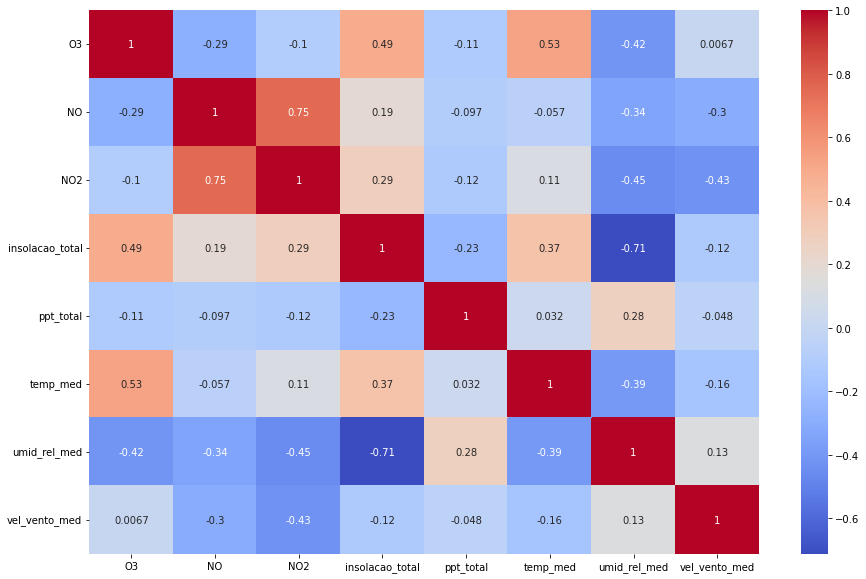

In [ ]:
#@title
plt.figure(figsize=(15,10))
sns.heatmap(cetesb_inmet_dia.drop(['data_hora', 
                                   'dia_da_semana'], 
                                  axis=1
                                  ).corr(),
            cmap='coolwarm',
            annot=True
            );

####Monthly

In [ ]:
#@title
cetesb_inmet_mes = df_mes.merge(inmet_mes.drop(['temp_min',
                                                'temp_max', 
                                                'mes'], 
                                               axis = 1
                                              ), 
                                left_on = 'data_hora',
                                right_on = 'data',
                                how = 'outer'
                                )

cetesb_inmet_mes.drop('data', 
                      axis = 1, 
                      inplace = True
                    )

# cetesb_inmet_mes.head()

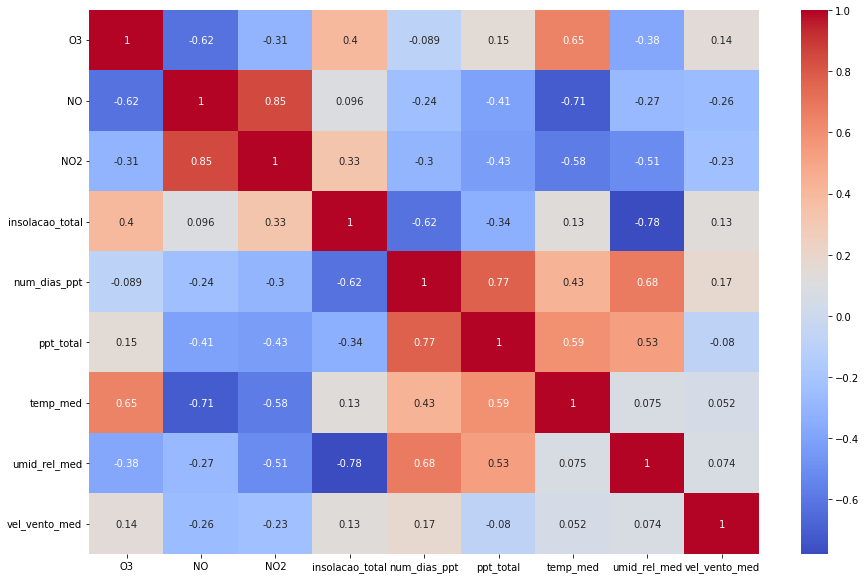

In [ ]:
#@title
plt.figure(figsize=(15,10))
sns.heatmap(cetesb_inmet_mes.drop(['data_hora', 
                                   'mes'], 
                                  axis=1
                                  ).corr(),
            cmap='coolwarm',
            annot=True
            );

##Drop rows with nan or inf

In [ ]:
#@title
# Changing option context to use infinite as nan
# Drop the rows with nan or infinite values

with pd.option_context('mode.use_inf_as_na', True):
  df_dia.dropna(subset = ['O3', 'NO', 'NO2'], 
          how = 'any', 
          inplace = True
          )

with pd.option_context('mode.use_inf_as_na', True):
  df_mes.dropna(subset = ['O3', 'NO', 'NO2'], 
          how = 'any', 
          inplace = True
          )
  
with pd.option_context('mode.use_inf_as_na', True):
  inmet_dia.dropna(
                # subset = ['O3', 'NO', 'NO2'], 
                how = 'any', 
                inplace = True
                )

with pd.option_context('mode.use_inf_as_na', True):
  inmet_mes.dropna(
                # subset = ['O3', 'NO', 'NO2'], 
                how = 'any', 
                inplace = True
                )
  
with pd.option_context('mode.use_inf_as_na', True):
  cetesb_inmet_dia.dropna(
                          # subset = ['O3', 'NO', 'NO2'], 
                          how = 'any', 
                          inplace = True
                          )
  
with pd.option_context('mode.use_inf_as_na', True):
  cetesb_inmet_mes.dropna(
                          # subset = ['O3', 'NO', 'NO2'], 
                          how = 'any', 
                          inplace = True
                          )

##Simple

Batch Gradient Descent

In [ ]:
#@title
cols = ['O3', 'NO', 'NO2']

###CETESB

####Daily

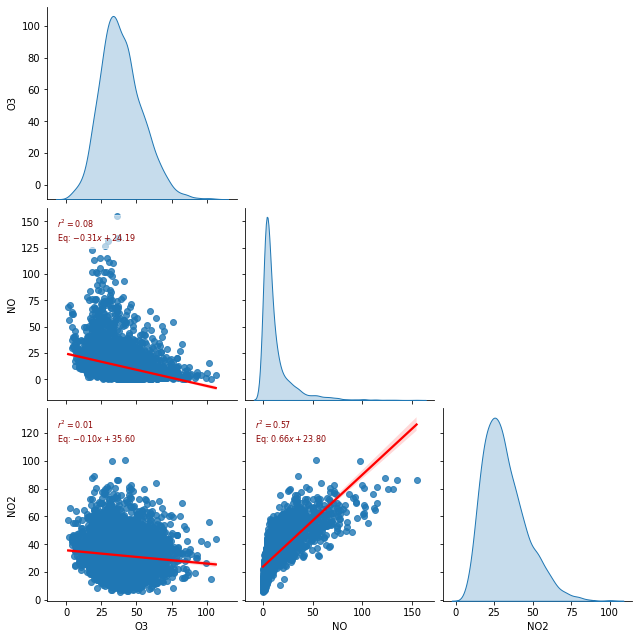

In [ ]:
#@title
def r2(x, y, ax=None, **kws):
    ax = ax or plt.gca()
    slope, intercept, r_value, p_value, std_err = linregress(x=x, y=y)
    ax.annotate(f'$r^2 = {r_value ** 2:.2f}$\nEq: ${slope:.2f}x{intercept:+.2f}$',
                xy=(.05, .95), xycoords=ax.transAxes, fontsize=8,
                color='darkred', backgroundcolor='#FFFFFF99', ha='left', va='top')

g = sns.pairplot(df_dia[cols], kind='reg', diag_kind='kde', height=3,
                 plot_kws={'line_kws': {'color': 'red'}})
g.map_lower(r2)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
plt.show()

####Monthly

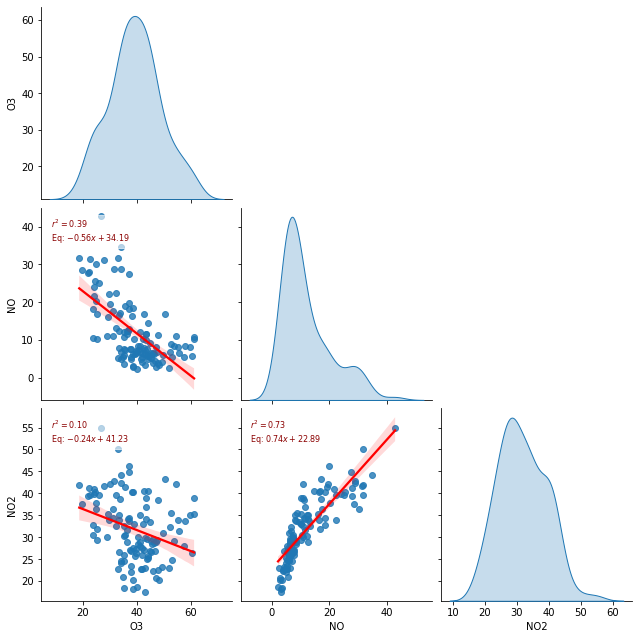

In [ ]:
#@title
def r2(x, y, ax=None, **kws):
    ax = ax or plt.gca()
    slope, intercept, r_value, p_value, std_err = linregress(x=x, y=y)
    ax.annotate(f'$r^2 = {r_value ** 2:.2f}$\nEq: ${slope:.2f}x{intercept:+.2f}$',
                xy=(.05, .95), xycoords=ax.transAxes, fontsize=8,
                color='darkred', backgroundcolor='#FFFFFF99', ha='left', va='top')

g = sns.pairplot(df_mes[cols], kind='reg', diag_kind='kde', height=3,
                 plot_kws={'line_kws': {'color': 'red'}})
g.map_lower(r2)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
plt.show()

####Yearly

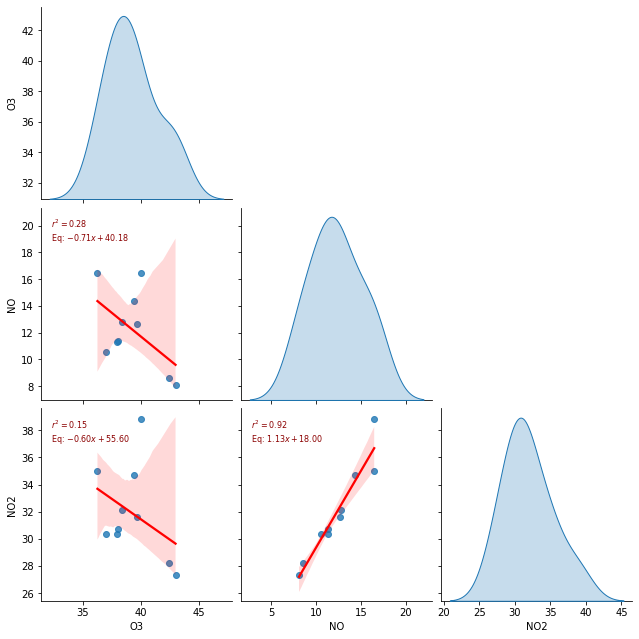

In [ ]:
#@title
def r2(x, y, ax=None, **kws):
    ax = ax or plt.gca()
    slope, intercept, r_value, p_value, std_err = linregress(x=x, y=y)
    ax.annotate(f'$r^2 = {r_value ** 2:.2f}$\nEq: ${slope:.2f}x{intercept:+.2f}$',
                xy=(.05, .95), xycoords=ax.transAxes, fontsize=8,
                color='darkred', backgroundcolor='#FFFFFF99', ha='left', va='top')

g = sns.pairplot(df_ano[cols], kind='reg', diag_kind='kde', height=3,
                 plot_kws={'line_kws': {'color': 'red'}})
g.map_lower(r2)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
plt.show()

###CETESB + INMET

####Daily

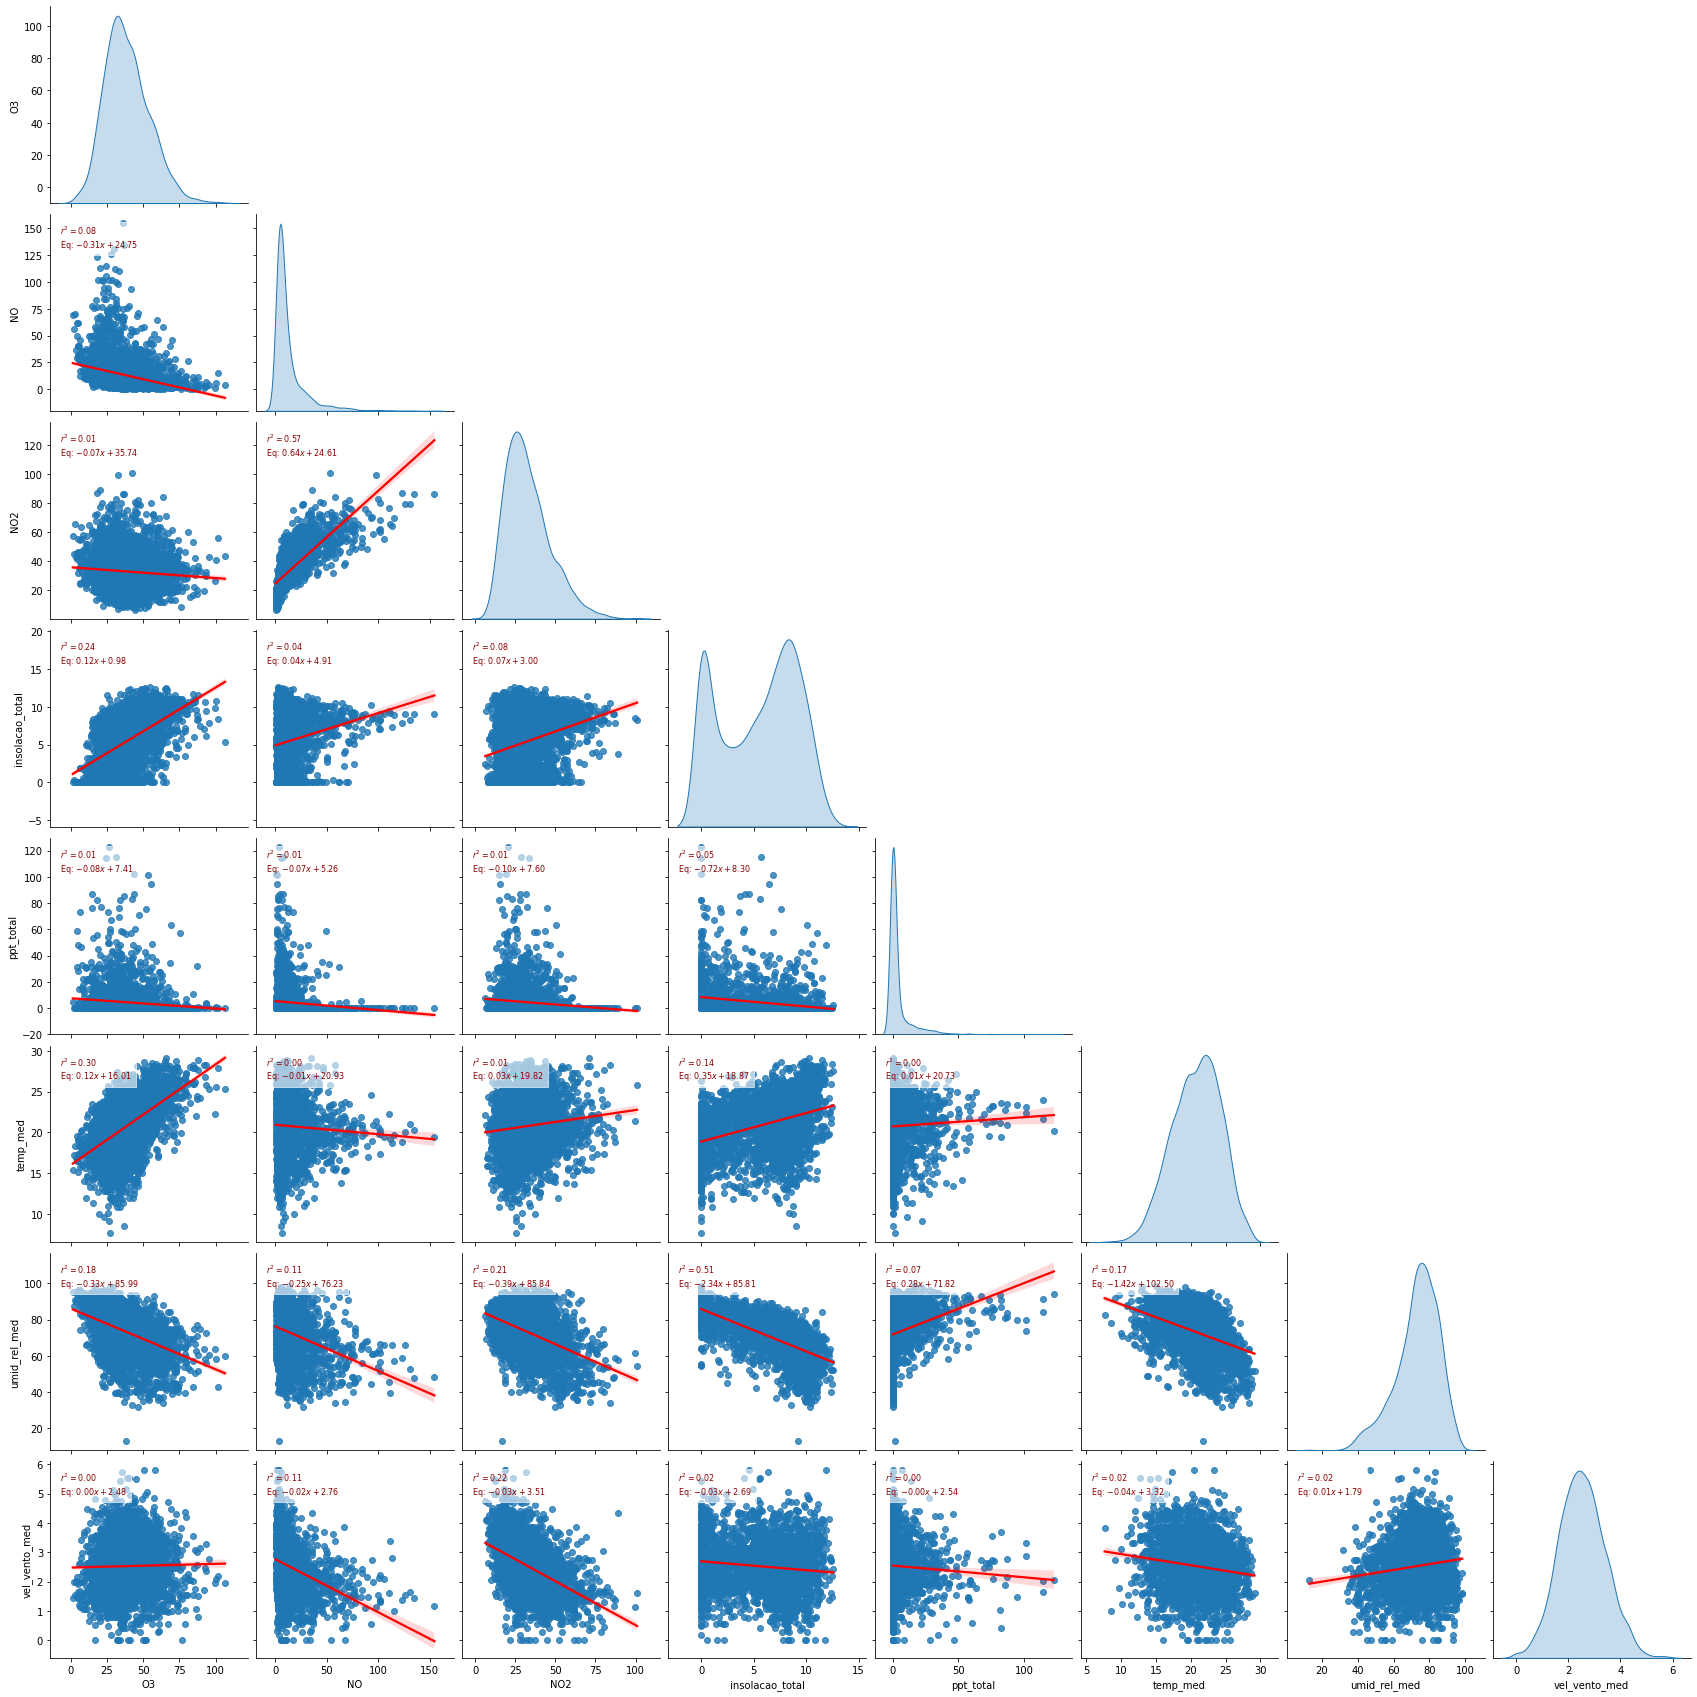

In [ ]:
#@title
def r2(x, y, ax=None, **kws):
    ax = ax or plt.gca()
    slope, intercept, r_value, p_value, std_err = linregress(x=x, y=y)
    ax.annotate(f'$r^2 = {r_value ** 2:.2f}$\nEq: ${slope:.2f}x{intercept:+.2f}$',
                xy=(.05, .95), xycoords=ax.transAxes, fontsize=8,
                color='darkred', backgroundcolor='#FFFFFF99', ha='left', va='top')

g = sns.pairplot(cetesb_inmet_dia.drop(['data_hora', 
                                        'dia_da_semana'], 
                                       axis=1
                                      ), 
                 kind='reg', 
                 diag_kind='kde', 
                 height=3,
                 plot_kws={'line_kws': {'color': 'red'}}
                )
g.map_lower(r2)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
plt.show()

####Monthly

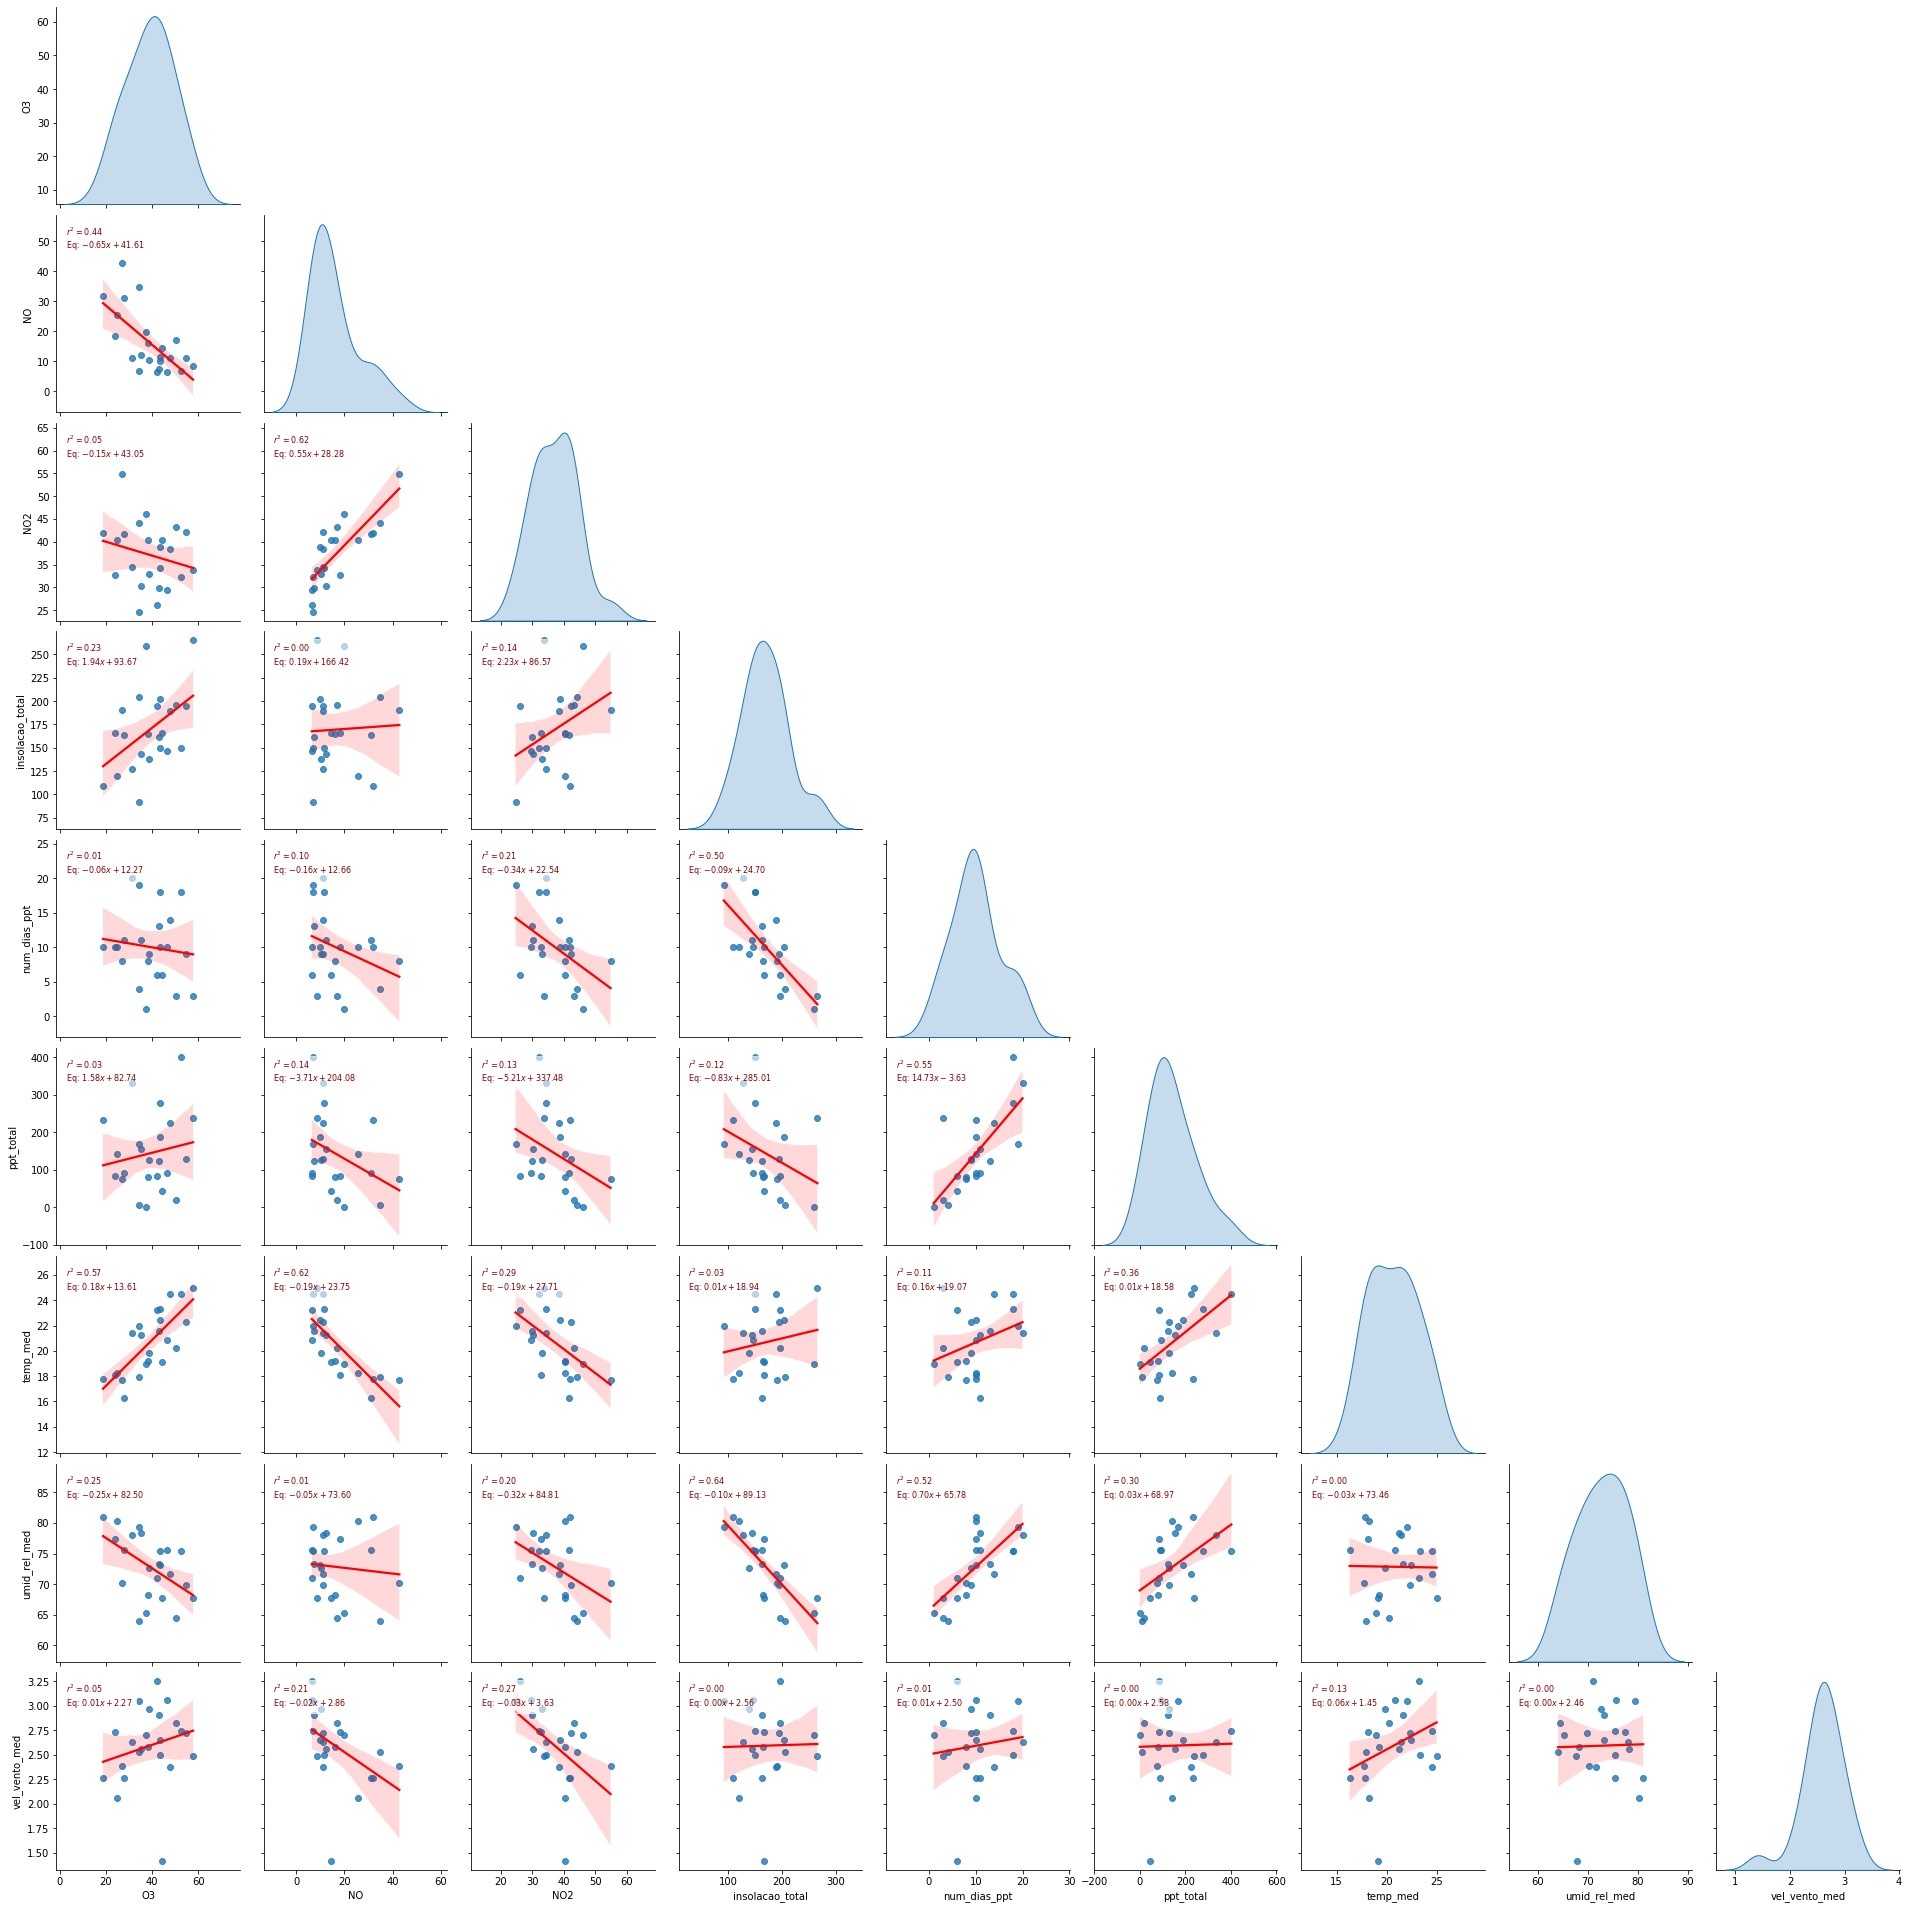

In [ ]:
#@title
def r2(x, y, ax=None, **kws):
    ax = ax or plt.gca()
    slope, intercept, r_value, p_value, std_err = linregress(x=x, y=y)
    ax.annotate(f'$r^2 = {r_value ** 2:.2f}$\nEq: ${slope:.2f}x{intercept:+.2f}$',
                xy=(.05, .95), xycoords=ax.transAxes, fontsize=8,
                color='darkred', backgroundcolor='#FFFFFF99', ha='left', va='top')

g = sns.pairplot(cetesb_inmet_mes.drop(['data_hora', 
                                        'mes'], 
                                       axis=1
                                      ), 
                 kind='reg', 
                 diag_kind='kde', 
                 height=3,
                 plot_kws={'line_kws': {'color': 'red'}}
                )
g.map_lower(r2)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
plt.show()